In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


11501568/11490434 [==============================] - 0s 0us/step


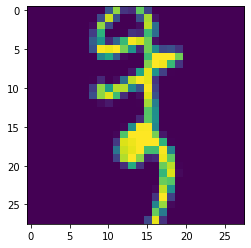

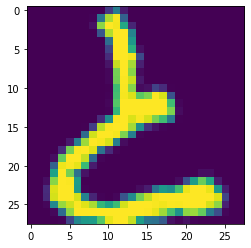

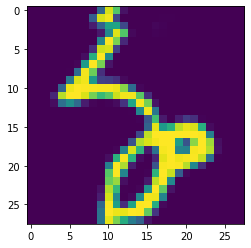

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [ ]:
%matplotlib inline
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras import models, layers, utils, datasets
(_trainData, _trainLabels), (_testData, _testLabels) = datasets.mnist.load_data()
from matplotlib import pyplot

def showImage(image):  
    pyplot.imshow(image)
    pyplot.show()

dir1 = "/gdrive/MyDrive/Colab_Notebooks/kmnist/k49-train-imgs.npz"
dir2 = "/gdrive/MyDrive/Colab_Notebooks/kmnist/k49-train-labels.npz"
dir3 = "/gdrive/MyDrive/Colab_Notebooks/kmnist/k49-test-imgs.npz"
dir4 = "/gdrive/MyDrive/Colab_Notebooks/kmnist/k49-test-labels.npz"

timg   = np.load(dir1)['arr_0']
tlabel  = np.load(dir2)['arr_0']
vimg   = np.load(dir3)['arr_0']
vlabel  = np.load(dir4)['arr_0']


for i in range(0, 3):
    showImage(timg[i])

timg,vimg = timg.reshape(232365,28,28,1).astype("float32"),vimg.reshape(38547,28,28,1).astype("float32")
timg,vimg = timg/255,vimg/255

tlabel,vlabel = utils.to_categorical(tlabel, 49), utils.to_categorical(vlabel, 49)

_model = models.Sequential()
_model.add(layers.Conv2D(32,kernel_size=3,padding="same",input_shape=(28,28,1),
activation='relu'))
_model.add(layers.Conv2D(32,kernel_size=3,padding="same",activation='relu'))
_model.add(layers.Conv2D(32,kernel_size=3,padding="same",activation='relu'))
_model.add(layers.MaxPooling2D(pool_size=(2,2)))
_model.add(layers.Conv2D(64,kernel_size=3,padding="same",activation='relu'))
_model.add(layers.Conv2D(64,kernel_size=3,padding="same",activation='relu'))
_model.add(layers.MaxPooling2D(pool_size=(2,2)))
_model.add(layers.Dropout(0.1))
_model.add(layers.Conv2D(64,kernel_size=3,padding="same",activation='relu'))
_model.add(layers.Conv2D(64,kernel_size=3,padding="same",activation='relu'))
_model.add(layers.MaxPooling2D(pool_size=(2,2)))
_model.add(layers.Dropout(0.1))
_model.add(layers.Flatten())
_model.add(layers.Dense(512, activation='relu'))
_model.add(layers.Dense(49, activation='softmax'))


print(_model.summary())

_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
_history = _model.fit(x=timg, y=tlabel, epochs=10, batch_size=128, validation_data=(vimg,vlabel),shuffle=True )
_scores = _model.evaluate(x=vimg, y=vlabel)
print(_scores)

from matplotlib import pyplot
def showTrainHistory(_history, key_loss, key_acc, title):  
    pyplot.plot(_history.history[key_loss])  
    pyplot.plot(_history.history[key_acc])  
    pyplot.title(title)  
    pyplot.ylabel(key_loss+','+key_acc)  
    pyplot.xlabel('Epoch')  
    pyplot.legend([key_loss, key_acc], loc='upper left')  
    pyplot.show()

showTrainHistory(_history,"accuracy","val_accuracy","ACC Model")
showTrainHistory(_history,"loss","val_loss","LOSS Model")

In [ ]:
simg   = np.load(dir3)['arr_0']
slabel   = np.load(dir4)['arr_0']

import random
for i in range(30):
  img = np.load(dir3)['arr_0']
  img = (img.reshape(38547,28,28,1).astype("float32"))/255
  rn = random.randint(0, 9999)
  predictions = np.argmax(_model.predict(img)[rn], axis=-1)
  
  print("word number: ")
  print(rn)
  showImage(simg[rn])
  print("prediction: ")
  string = "あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほまみむめもやゆよらりるれろわゐゑをんゝ"
  print(string[predictions])
  
  print("answer :")
  for k in range(0,49):
    if(vlabel[rn][k]==1):
      print(string[k])
      break
  print("=================================")


In [ ]:
from google.colab import files
import numpy as np
import os
string = "あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほまみむめもやゆよらりるれろわゐゑをんゝ"

upload_dir = "/content/testing/"
for file in os.listdir(upload_dir):
  uploaded = np.ndarray(shape=(1,28,28,1))
  uploaded = cv2.imread(upload_dir+'/'+file)
  uploaded = cv2.cvtColor(uploaded, cv2.COLOR_BGR2GRAY)
  showImage(uploaded)
  uploaded = (uploaded.reshape(1,28,28,1).astype("float32"))/255
  predictions = np.argmax(_model.predict(uploaded)[0], axis=-1)
  print("prediction: ")
  print(string[predictions])
  print("=================================")



